In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns

np.random.seed(2)

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools

from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop
from keras.callbacks import ReduceLROnPlateau


sns.set_theme(style='white', context='notebook', palette='deep')

In [15]:
train_X = pd.read_csv("kaggle_datasets/train.csv")
test_data = pd.read_csv("kaggle_datasets/test.csv")
train_Y = train_X.pop('label')

In [16]:
from keras.utils import to_categorical
#train_X.describe()
train_X = train_X / 255.0
test_data = test_data / 255.0
train_X = train_X.values.reshape(-1,28,28,1)
test_data = test_data.values.reshape(-1,28,28,1)
train_Y = to_categorical(train_Y, num_classes = 10)

In [18]:
#display(train_X.shape, test_data.shape)
train_X, val_X, train_Y, val_Y = train_test_split(train_X, train_Y, test_size = 0.1, random_state=2)

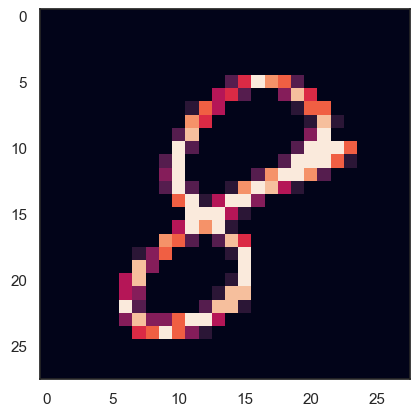

In [22]:
g = plt.imshow(train_X[0][:,:,0])

In [23]:
# model = Sequential([
#     Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
#                  activation ='relu', input_shape = (28,28,1)),
#     Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
#                  activation ='relu'),
#     MaxPool2D(pool_size=(2,2)),
#     Dropout(0.25),
#     Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
#                  activation ='relu'),
#     Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
#                  activation ='relu'),
#     MaxPool2D(pool_size=(2,2), strides=(2,2)),
#     Dropout(0.25),
#     Flatten(),
#     Dense(256, activation = "relu"),
#     Dropout(0.5),
#     Dense(10, activation = "softmax")
# ])
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPool2D(pool_size=(2, 2)),
    Dropout(0.25),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

In [28]:
optimizer = RMSprop(learning_rate=0.001, rho=0.9, epsilon=1e-08)
model.compile(
    optimizer=optimizer,
    loss='categorical_crossentropy',
    metrics=['accuracy'],
)

In [29]:
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(
    patience=5,
    min_delta=0.001,
    restore_best_weights=True,
)
history = model.fit(
    train_X, train_Y,
    validation_data=(val_X, val_Y),
    batch_size=512,
    epochs=200,
    callbacks=[early_stopping],
)

Epoch 1/200
74/74 [==============================] - 16s 205ms/step - loss: 0.0942 - accuracy: 0.9721 - val_loss: 0.0575 - val_accuracy: 0.9817
Epoch 2/200
74/74 [==============================] - 16s 219ms/step - loss: 0.0767 - accuracy: 0.9778 - val_loss: 0.0478 - val_accuracy: 0.9862
Epoch 3/200
74/74 [==============================] - 18s 243ms/step - loss: 0.0690 - accuracy: 0.9789 - val_loss: 0.0470 - val_accuracy: 0.9857
Epoch 4/200
74/74 [==============================] - 31s 426ms/step - loss: 0.0630 - accuracy: 0.9805 - val_loss: 0.0506 - val_accuracy: 0.9864
Epoch 5/200
74/74 [==============================] - 46s 615ms/step - loss: 0.0580 - accuracy: 0.9829 - val_loss: 0.0438 - val_accuracy: 0.9876
Epoch 6/200
74/74 [==============================] - 18s 246ms/step - loss: 0.0520 - accuracy: 0.9843 - val_loss: 0.0419 - val_accuracy: 0.9879
Epoch 7/200
74/74 [==============================] - 19s 255ms/step - loss: 0.0471 - accuracy: 0.9855 - val_loss: 0.0422 - val_accuracy:

In [30]:
results = model.predict(test_data)

# select the indix with the maximum probability
results = np.argmax(results,axis = 1)

results = pd.Series(results,name="Label")

875/875 [==============================] - 6s 7ms/step


In [31]:
submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),results],axis = 1)

submission.to_csv("submission.csv",index=False)

In [32]:
import pickle

# save the iris classification model as a pickle file
model_pkl_file = "digit_classification.pkl"  

with open(model_pkl_file, 'wb') as file:  
    pickle.dump(model, file)

In [25]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pickle
with open('digit_classification.pkl', 'rb') as file:
    model = pickle.load(file)
data = pd.read_csv("data.csv")
data = data.drop('Unnamed: 0', axis=1)
np_data = data.values
reshaped_data = np_data.reshape(-1,28, 28,1)
model.predict(reshaped_data)


1/1 [==============================] - 0s 42ms/step


array([[0.01857644, 0.16586967, 0.2705715 , 0.01057088, 0.14498566,
        0.01397792, 0.0066797 , 0.2626841 , 0.09879902, 0.00728517]],
      dtype=float32)

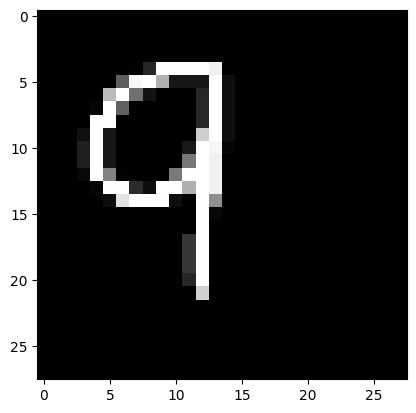

In [26]:
import matplotlib.pyplot as plt

# Assuming reshaped_data is correctly reshaped to (-1, 28, 28, 1)
# Visualize the first image
plt.imshow(reshaped_data[0, :, :, 0], cmap='gray')
plt.show()

In [30]:
display(reshaped_data.max(), reshaped_data.min())

1.0

0.0